# ** plotting codon usage bias ** 

In [6]:
import json 
import random
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from datetime import datetime

In [16]:
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

SynonymousCodons = {'CYS': ['TGT', 'TGC'], 'ASP': ['GAT', 'GAC'],
'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'],
'GLN': ['CAA', 'CAG'], 'MET': ['ATG'], 'ASN': ['AAC', 'AAT'],
'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 'LYS': ['AAG', 'AAA'],
'STOP': ['TAG', 'TGA', 'TAA'], 'THR': ['ACC', 'ACA', 'ACG', 'ACT'],
'PHE': ['TTT', 'TTC'], 'ALA': ['GCA', 'GCC', 'GCG', 'GCT'],
'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 'ILE': ['ATC', 'ATA', 'ATT'],
'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 'HIS': ['CAT', 'CAC'],
'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 'TRP': ['TGG'],
'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 'GLU': ['GAG', 'GAA'], 'TYR': ['TAT', 'TAC']}

get_aa_dict = {}#dictionary that turns codon into aa 
for key,value in SynonymousCodons.items(): 
    for codon in value: 
        get_aa_dict[codon] = key 

codon_usage_dict = {'AAA': 0.77, 'AAC': 1.0, 'AAG': 1.0, 'AAT': 0.89, 'ACA': 0.81, 'ACC': 1.0, 'ACG': 0.32, 'ACT': 0.7, 'AGA': 1.0, 'AGC': 1.0, 'AGG': 1.0,
 'AGT': 0.62, 'ATA': 0.36, 'ATC': 1.0, 'ATG': 1.0, 'ATT': 0.77, 'CAA': 0.36, 'CAC': 1.0, 'CAG': 1.0, 'CAT': 0.72, 'CCA': 0.83, 'CCC': 1.0, 'CCG': 0.36, 'CCT': 0.87,
 'CGA': 0.51, 'CGC': 0.88, 'CGG': 0.97, 'CGT': 0.38, 'CTA': 0.18, 'CTC': 0.49, 'CTG': 1.0, 'CTT': 0.33, 'GAA': 0.73, 'GAC': 1.0, 'GAG': 1.0, 'GAT': 0.86, 'GCA': 0.56,
 'GCC': 1.0, 'GCG': 0.27, 'GCT': 0.64, 'GGA': 0.73, 'GGC': 1.0, 'GGG': 0.75, 'GGT': 0.47, 'GTA': 0.25, 'GTC': 0.51, 'GTG': 1.0, 'GTT': 0.39, 'TAA': 0.53, 'TAC': 1.0,
 'TAG': 0.43, 'TAT': 0.8, 'TCA': 0.63, 'TCC': 0.9, 'TCG': 0.23, 'TCT': 0.77, 'TGA': 1.0, 'TGC': 1.0, 'TGG': 1.0, 'TGT': 0.84, 'TTA': 0.19, 'TTC': 1.0, 'TTG': 0.32, 'TTT': 0.84} 
# copied form rob notebook 

In [10]:
# importing dna 
DNAI = open("CodingUsage_DNA_gen0.txt").readlines()[0]
initial_codons = []
for i in range(1, len(DNAI), 3): 
    codon = DNAI[i-1:i+2]
    initial_codons.append(codon)

In [1]:
nTrial = 10
nGen_toUse = 600000
DNAF_dict = {}
for trial_name in ["Trial"+str(n) for n in range(1,nTrial+1)]: 
    dnaf = open("data/CodonUsage_{t}_DNA_final_cds_invariant50_{g}.txt".format(t=trial_name, g=nGen_toUse)).readlines()[0]
    codons = []
    for i in range(1, len(dnaf)-1,3): 
        codon = dnaf[i-1:i+2]
        codons.append(codon)
    DNAF_dict[trial_name] = [dnaf , codons]

In [4]:
#shwing that the codon counter worked 
print(DNAF_dict["Trial2"][0][-10:])
print(DNAF_dict["Trial2"][1][-10:])

ACTTATATAA
['ATA', 'TTA', 'AAT', 'ATA', 'GTC', 'TTG', 'ATA', 'CTT', 'ATA', 'TAA']


In [8]:
#appending codon counts to dictionary for each trial 
# each key is a codon, with ntrial entries 
codon_countf_dict = {}
for codon in get_aa_dict.keys(): #all codons are keys 
    counts_list = []
    for trial_name in ["Trial"+str(n) for n in range(1,nTrial+1)]:
        countf = DNAF_dict[trial_name][1].count(codon)
        counts_list.append(countf)

    codon_countf_dict[codon] = counts_list

In [11]:
codon_counti_dict = {}
for codon in get_aa_dict.keys():
    counti = initial_codons.count(codon)
    codon_counti_dict[codon] = counti

In [12]:
codon_countf_dict

{'AAA': [1751, 1683, 1672, 1792, 1680, 1673, 1704, 1671, 1765, 1711],
 'AAC': [810, 779, 780, 817, 762, 753, 777, 795, 781, 780],
 'AAG': [1112, 1103, 1133, 1074, 1122, 1061, 1136, 1158, 1118, 1146],
 'AAT': [1074, 1081, 1083, 1066, 1095, 1055, 1142, 1081, 1041, 1071],
 'ACA': [1022, 998, 1065, 994, 996, 977, 1026, 954, 1051, 1021],
 'ACC': [416, 423, 407, 422, 419, 441, 415, 417, 448, 443],
 'ACG': [171, 169, 174, 187, 157, 183, 182, 175, 169, 185],
 'ACT': [869, 930, 904, 882, 940, 921, 894, 911, 920, 899],
 'AGA': [761, 802, 770, 741, 768, 800, 741, 785, 757, 821],
 'AGC': [475, 452, 470, 440, 447, 496, 453, 481, 455, 453],
 'AGG': [346, 361, 391, 380, 356, 400, 343, 362, 355, 383],
 'AGT': [851, 951, 943, 936, 901, 933, 887, 947, 928, 909],
 'ATA': [843, 856, 837, 835, 840, 818, 851, 860, 842, 784],
 'ATC': [541, 511, 529, 539, 550, 546, 528, 500, 479, 516],
 'ATG': [679, 669, 668, 689, 645, 668, 674, 700, 711, 657],
 'ATT': [968, 1002, 937, 991, 962, 1014, 901, 975, 1008, 978],
 '

In [17]:
change_mean = []
change_se = []
codons = []
codon_usage = []
for key,value in codon_countf_dict.items(): 
    counti = codon_counti_dict[key]
    change_list = []
    for count in value: 
        if counti != 0:
            change = (count - counti)/counti
            change_list.append(change)
        if counti == 0: 
            change = (count - counti)
            change_list.append(change)
    
    codons.append(key)
    change_mean.append(round(np.mean(change_list),2))
    change_se.append(round(np.std(change_list)/np.sqrt(nTrial),2))
    codon_usage.append(codon_usage_dict[key])

In [19]:
plt.style.use("seaborn-ticks")

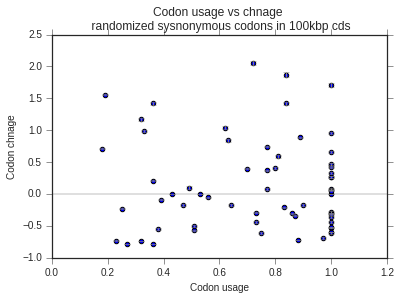

In [29]:
plt.scatter(codon_usage, change_mean)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.errorbar(codon_usage, change_mean, yerr = np.array(change_se), ecolor = "grey", ls = "None")
plt.title("Codon usage vs chnage \n randomized sysnonymous codons in 100kbp cds")
plt.ylabel("Codon chnage")
plt.xlabel("Codon usage")
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M").replace("/", "_").replace(":", "_") 
# plt.savefig("plots/Codon-Usage_{d}_proportional_change.png".format(d=timestamp))

** now lets try mutability ** 

In [25]:
muts = []
for codon_key in codon_countf_dict.keys(): 
    muts.append(model[codon_key][0])

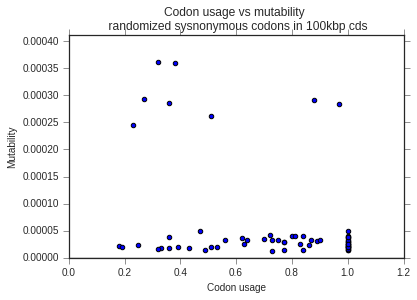

In [30]:
plt.scatter(codon_usage, muts)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.title("Codon usage vs mutability \n randomized sysnonymous codons in 100kbp cds")
plt.ylabel("Mutability")
plt.xlabel("Codon usage")
plt.ylim(0, max(muts)+0.00005)
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M").replace("/", "_").replace(":", "_") 
# plt.savefig("plots/Codon-Usage_{d}_mutability.png".format(d=timestamp))